In [29]:
import pickle
import numpy as np
import pandas as pd 

with open('history.pkl', 'rb') as f:
    df_list = pickle.load(f)

print(f'Stage 0: {len(df_list)} items')

df_adj_close = pd.DataFrame()
i = 0
for df in df_list:
    df_adj_close[f'close_{i}'] = df['Adj Close']
    i = i + 1
    
# df_adj_close
# let's diff it.
df_adj_close = df_adj_close.fillna(0)
df2 = df_adj_close.diff()
# drop first row
df2 = df2[1:]
df2 = np.sign(df2)


Stage 0: 241 items


Date
2018-12-28    0.733333
2019-01-02    0.208333
2019-01-03   -0.398964
2019-01-04    0.887179
2019-01-07    0.481865
                ...   
2021-12-17   -0.063415
2021-12-20   -0.607843
2021-12-21    0.618090
2021-12-22    0.683168
2021-12-23    0.445545
Length: 757, dtype: float64

In [36]:
import yfinance as yf

start_date = '2018-12-22'
end_date = '2021-12-24'

i = 0
dax = yf.download('^GDAXI', 
                  start=start_date, 
                  end=end_date, 
                  progress=False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-27,10607.419922,10635.450195,10279.200195,10381.509766,10381.509766,104152600
2018-12-28,10452.019531,10586.799805,10431.379883,10558.959961,10558.959961,52604300
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500
...,...,...,...,...,...,...
2021-12-17,15599.750000,15609.509766,15419.549805,15531.690430,15531.690430,140842600
2021-12-20,15152.559570,15296.080078,15060.099609,15239.669922,15239.669922,69118800
2021-12-21,15379.080078,15452.419922,15305.610352,15447.440430,15447.440430,53329700


In [34]:
# a - d / (a+d)
ad_ratio = df2.sum(axis=1) /df2.abs().sum(axis=1)
ad_ratio[700:]

Date
2021-10-06   -0.813725
2021-10-07    0.542289
2021-10-08   -0.142857
2021-10-11    0.039604
2021-10-12    0.175879
2021-10-13    0.266332
2021-10-14    0.597990
2021-10-15    0.475248
2021-10-18   -0.124378
2021-10-19    0.194030
2021-10-20   -0.085427
2021-10-21    0.180000
2021-10-22    0.203980
2021-10-25    0.005076
2021-10-26    0.454545
2021-10-27   -0.151515
2021-10-28    0.247525
2021-10-29   -0.184466
2021-11-01    0.509804
2021-11-02    0.073171
2021-11-03    0.366337
2021-11-04    0.277228
2021-11-05   -0.073892
2021-11-08    0.099010
2021-11-09    0.044335
2021-11-10   -0.073892
2021-11-11    0.010000
2021-11-12    0.156863
2021-11-15    0.205882
2021-11-16   -0.073892
2021-11-17   -0.204082
2021-11-18   -0.356098
2021-11-19   -0.213930
2021-11-22   -0.196078
2021-11-23   -0.611650
2021-11-24   -0.287805
2021-11-25    0.253731
2021-11-26   -0.786408
2021-11-29    0.223881
2021-11-30   -0.383085
2021-12-01    0.570732
2021-12-02   -0.696078
2021-12-03   -0.456311
2021-1

In [40]:
dax['ad_ratio'] = ad_ratio
x1 = dax[['Adj Close','ad_ratio']]

<AxesSubplot:xlabel='Date'>

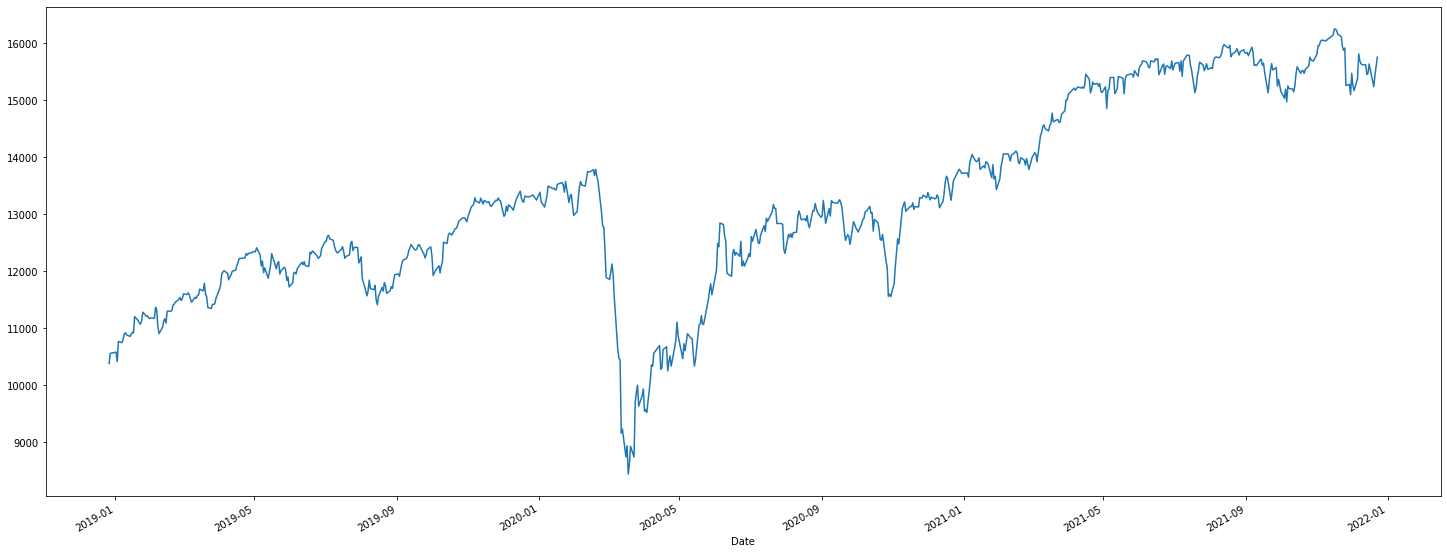

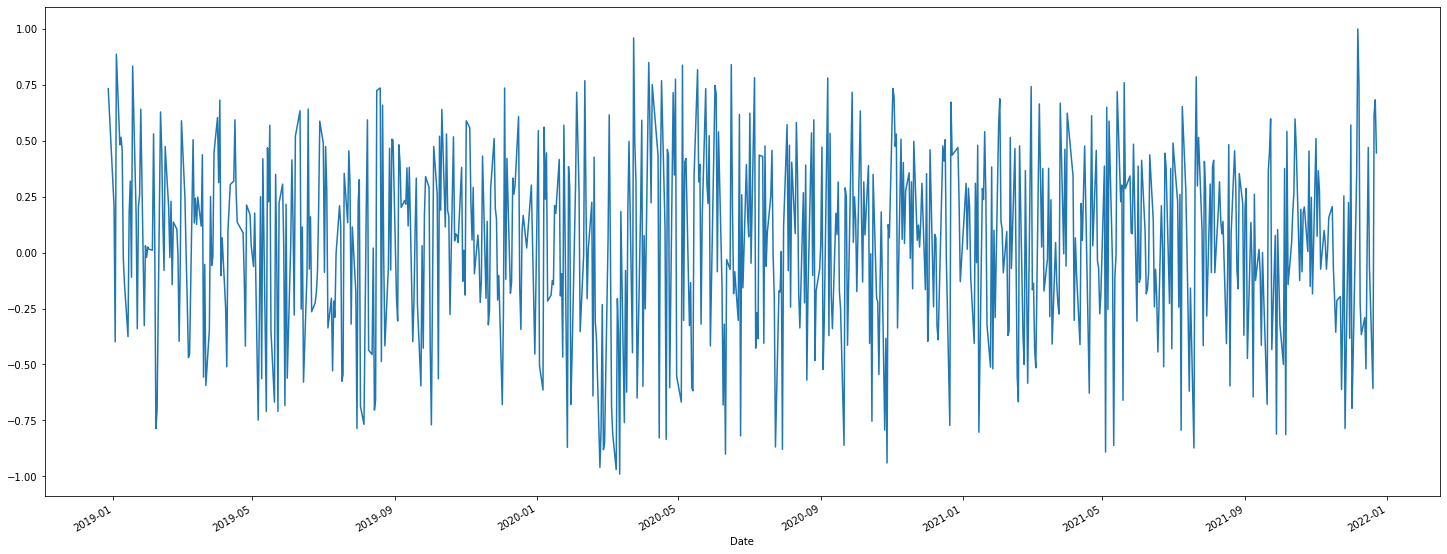

In [46]:
import matplotlib as plt
plt.rcParams['figure.figsize'] = [25, 10]
x1['Adj Close'].plot()
plt.pyplot.figure()
x1['ad_ratio'].plot()